# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

# **Aprendizaje Supervisado**

En este cuaderno, se cubriran los siguientes temas:

### 1. Preparación de Datos
### 2. Árboles de Decisión
### 3. K-nearest Neighbors
### 4. Métricas para Modelos de Clasificación

In [1]:
# Librerías a importar
import pandas as pd                 # manipular conjuntos de datos (dataframe)
import numpy as np                  # operaciones matrices
import matplotlib.pyplot as plt     # gráficos simples
import seaborn as sns               # gráficos más complejos

# 1. Preparación de Datos

In [2]:
print("Descargando Assets a Colab")
!wget --quiet --show-progress --output-document=carRisk.csv https://drive.google.com/uc?id=1VZRxpz_-CJCGrfwJbTlOpMKtqqQ38dFw&export=download

Descargando Assets a Colab
carRisk.csv         100%[===================>]  10.56K  --.-KB/s    in 0s      


In [4]:
# Leer el archivo csv como dataframe
data = pd.read_csv("carRisk.csv")

# Muestra los primeros registros del dataframe
data.head()

,age,cartype,risk
0,20,combi,high
1,18,sport,high
2,40,sport,high
3,50,family,low
4,35,minivan,low


In [5]:
# Descripción de los tipos de datos del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      720 non-null    int64 
 1   cartype  720 non-null    object
 2   risk     720 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.0+ KB


In [6]:
#Corrección del tipo de datos
data['risk'] = data['risk'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      720 non-null    int64   
 1   cartype  720 non-null    object  
 2   risk     720 non-null    category
dtypes: category(1), int64(1), object(1)
memory usage: 12.2+ KB


### 1.1 Análisis Exploratorio de los Datos

**Descripción de variables numéricas**


In [7]:
# Descripción estadistica de variables numéricas
data.describe()

,age
count,720.000000
mean,33.125000
std,9.974847
min,18.000000
25%,27.500000
50%,33.500000
75%,40.000000
max,50.000000


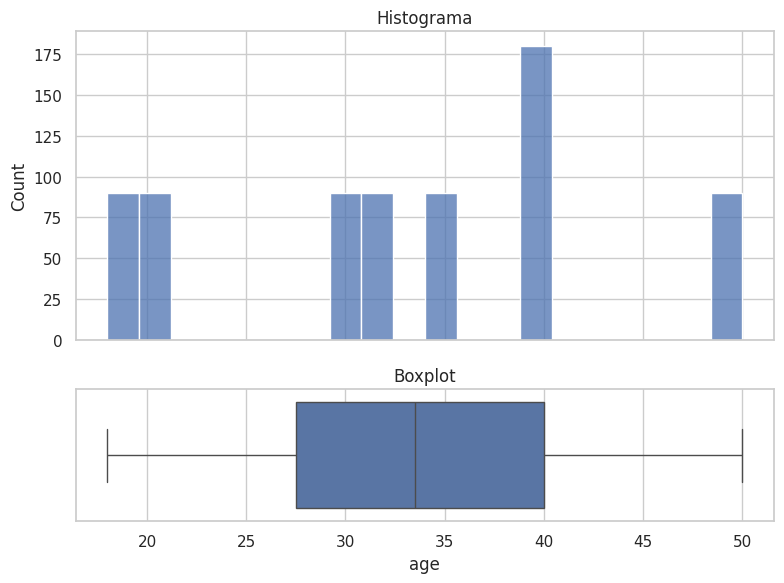

In [8]:
# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True, gridspec_kw={"height_ratios": (0.7, 0.3)})

# Histograma en el primer subgráfico
sns.histplot(data['age'], bins=20, ax=axes[0])
axes[0].set_title('Histograma')

# Boxplot en el segundo subgráfico
sns.boxplot(data['age'], orient='h', ax=axes[1])
axes[1].set_title('Boxplot')

# Ajustar el diseño para que las gráficas estén más cerca
plt.tight_layout()

# Mostrar la visualización
plt.show()

**Descripción de variables categóricas**

In [9]:
#Graficar variable 'cartype' en estilo pie chart


In [10]:
#Graficar variable 'risk' en estilo barras


**Transformación de variables categóricas**

In [11]:
# Transformación dummy para convertir los atributos categóricos a números
data = pd.get_dummies(data, columns=['cartype'])

data.head()

,age,risk,cartype_combi,cartype_family,cartype_minivan,cartype_sport
0,20,high,True,False,False,False
1,18,high,False,False,False,True
2,40,high,False,False,False,True
3,50,low,False,True,False,False
4,35,low,False,False,True,False


In [17]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Usar metodo de transformación sobre variable objetivo 'risk'
data['risk'] = labelencoder.fit_transform(data['risk'])

data.head()

,age,risk,cartype_combi,cartype_family,cartype_minivan,cartype_sport
0,20,0,True,False,False,False
1,18,0,False,False,False,True
2,40,0,False,False,False,True
3,50,1,False,True,False,False
4,35,1,False,False,True,False


### 1.2 Separación de datos en conjuntos de entrenamiento y prueba

La separación de datos en conjuntos de entrenamiento y prueba es una práctica común en el aprendizaje automático. Consiste en dividir un conjunto de datos en dos partes: un **conjunto de entrenamiento**, que se utiliza para entrenar el modelo, y un **conjunto de prueba**, que se utiliza para evaluar el rendimiento del modelo.

La separación de datos se realiza típicamente utilizando una proporción predefinida, donde una parte de los datos se asigna al conjunto de entrenamiento y el resto al conjunto de prueba. Esta división es crucial para evaluar correctamente el rendimiento del modelo y detectar posibles problemas de **sobreajuste** o **subajuste**.

En Python, una forma común de realizar esta separación es utilizando la función `train_test_split` de la biblioteca scikit-learn. Esta función toma como entrada los datos a dividir y la proporción deseada, y devuelve los conjuntos de entrenamiento y prueba.

Es importante especificar el tamaño del conjunto de prueba, que generalmente se elige entre el 20% y el 30% del total de los datos. Esto se hace utilizando el parámetro `test_size` de la función `train_test_split`.

Para más información sobre la función `train_test_split` consulta la documentación oficial en [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).


In [12]:
from sklearn.model_selection import train_test_split

# Crear subconjunto con variables dependientes (Atributos)
X = data.drop("risk", axis=1)

# Crear subconjunto con variable independiente (Objetivo)
y = data['risk']

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Es importante destacar que al especificar `random_state`, aseguramos que la división se realice de la misma manera cada vez que ejecutemos el código, lo que garantiza resultados reproducibles.

Cuando se establece `stratify=y` en un conjunto de etiquetas, el método `train_test_split` garantiza que la proporción de cada clase en el conjunto de entrenamiento y en el conjunto de prueba sea similar a la proporción de clases en el conjunto original.

Esto es especialmente útil cuando tenemos conjuntos de datos desequilibrados, es decir, cuando hay una diferencia significativa en el número de muestras entre las diferentes clases. Al usar `stratify`, evitamos problemas como la subrepresentación de clases en el conjunto de entrenamiento o la sobreestimación de la precisión del modelo debido a la distribución desigual de las clases.



<Axes: xlabel='risk'>

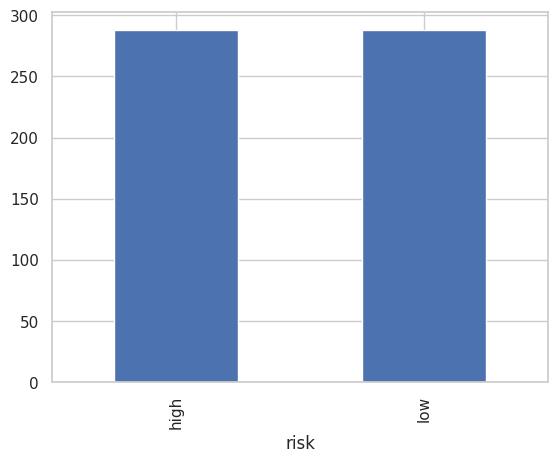

In [13]:
y_train.value_counts().plot(kind='bar')

<Axes: xlabel='risk'>

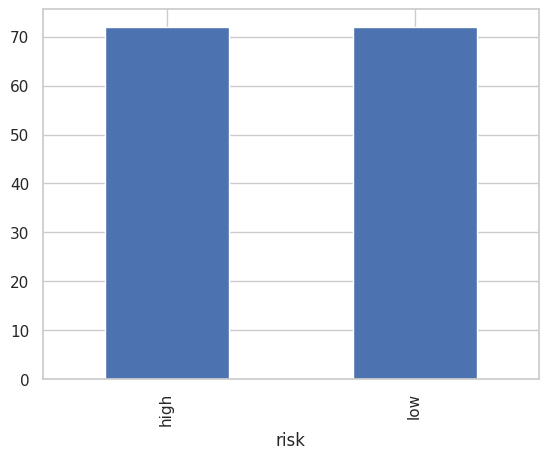

In [14]:
y_test.value_counts().plot(kind='bar')

# 2. Árboles de Decisión

### 2.1 Ajuste del Modelo con Datos de Entrenamiento

In [15]:
from sklearn import tree

# Instanciar el estimador 'DecisionTreeClassifier': usar entropia y profundidad maxima de 10
model_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

# Ajustar el modelo a los datos de entrenamiento
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

La función `DecisionTreeClassifier` de scikit-learn se utiliza para construir un modelo de árbol de decisión para clasificación. A continuación se describen los principales argumentos que pueden pasarse a esta función:

- `criterion`: Especifica la función para medir la calidad de una división. Puede ser "gini" para el índice Gini o "entropy" para la ganancia de información.

- `max_features`: La cantidad de características a considerar al buscar la mejor división:

- `max_depth`: La profundidad máxima del árbol. Si no se especifica, los nodos se expanden hasta que todas las hojas sean puras o hasta que contengan menos ejemplos que `min_samples_split`.

- `min_samples_split`: El número mínimo de muestras requeridas para dividir un nodo interno. Permite dividir un nodo solo si tiene al menos (x) muestras.

- `min_samples_leaf`: El número mínimo de muestras requeridas para ser considerado una hoja. Estamos diciendo al algoritmo que no cree hojas con menos de (x) muestras.

En resumen, los parámetros `min_samples_leaf`, `min_samples_split` y `max_depth` actúan como regularizadores, limitando la complejidad del árbol y reduciendo la probabilidad de overfitting.

**Para profundizar un poco más:**

- `min_samples_leaf`: Establece un límite inferior al número de muestras que debe haber en cada hoja. Al aumentar este valor, se fuerza al árbol a tomar decisiones basadas en grupos más grandes de datos, lo que suaviza las fronteras de decisión y reduce la varianza.
- `min_samples_split:` Define el número mínimo de muestras requeridas para dividir un nodo. Valores más altos promueven árboles más simples y menos propensos a sobreajustarse.
- `max_depth`: Limita la profundidad máxima del árbol. Al reducir la profundidad, se restringe el número de divisiones posibles y se limita la complejidad del modelo.

Dependiendo de la naturaleza del problema y los datos, es posible que desees experimentar con diferentes valores para estos argumentos para optimizar el rendimiento del modelo.


La función `plot_tree` de la librería scikit-learn sirve para visualizar un árbol de decisión que se ha entrenado previamente con datos. Esta visualización es una herramienta muy útil para entender cómo el modelo toma decisiones y clasifica nuevos datos.

Para opciones de personalización más avanzadas, consulta la documentación de plot_tree: [scikit-learn/plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

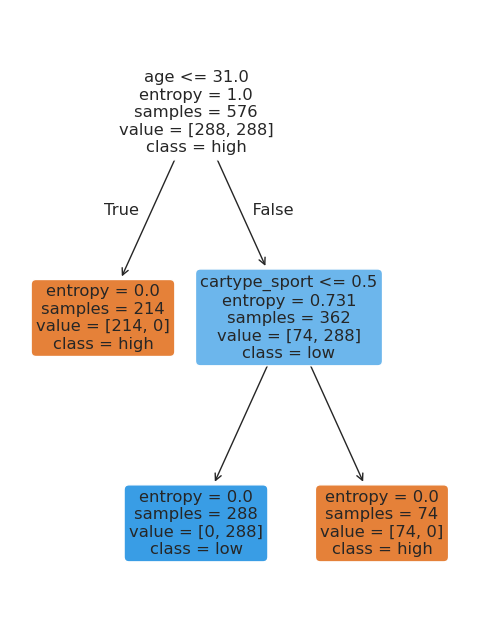

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(6,8))
plot_tree(model_tree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

El atributo `feature_importances_` es específico de los modelos de árboles de decisión en Scikit-learn y proporciona una medida de la importancia relativa de cada característica en la toma de decisiones del modelo. Esta medida se calcula durante el entrenamiento del modelo y se basa en cuánto cada característica contribuye a reducir la impureza en los nodos del árbol.

Cuando ajustas un modelo de árbol de decisión en Scikit-learn, este atributo es un array de longitud igual al número de características en tus datos. Cada elemento del array representa la importancia relativa de la correspondiente característica en la toma de decisiones del modelo.

In [19]:
model_tree.feature_importances_

array([0.54078774, 0.        , 0.        , 0.        , 0.45921226])


### 2.2 Evaluación del Modelo sobre el Conjunto de Prueba

**¿Qué significa evaluar un modelo sobre el conjunto de prueba?**

Una vez que hemos entrenado un modelo de machine learning, es crucial evaluarlo para determinar su desempeño en datos que no ha visto durante el entrenamiento. Esto nos permite estimar qué tan bien generalizará el modelo a nuevos datos y, por lo tanto, qué tan confiable es para tomar decisiones en situaciones reales.

**La métrica Accuracy: Una medida de tasa de acierto**

Una de las métricas más comunes para evaluar la exactitud de un modelo de clasificación es el **accuracy**. El accuracy representa la proporción de predicciones correctas realizadas por el modelo sobre el conjunto de prueba. Se calcula como la relación entre el número de predicciones correctas y el número total de predicciones.

In [20]:
from sklearn.metrics import accuracy_score

# Realiza predicciones sobre el conjunto de prueba utilizando el modelo entrenado
y_pred = model_tree.predict(X_test)

# Calcula la tasa de acierto del modelo comparando las predicciones con los valores reales
exactitud = accuracy_score(y_test, y_pred)

# Imprime el valor de la 'exactitud'
print(exactitud)

1.0


# 3. K-Nearest Neighbors

### 3.1 Ajuste del Modelo con Datos de Entrenamiento

In [21]:
from sklearn import neighbors

# Instanciar el estimador 'KNeighborsClassifier': usar metrica euclidiana y 5 vecinos mas cercanos
model_knn = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=5)

# Ajustar el modelo a los datos de entrenamiento
model_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

**Evaluación del Modelo sobre el Conjunto de Prueba**

In [22]:
from sklearn.metrics import accuracy_score

# Realiza predicciones sobre el conjunto de prueba utilizando el modelo entrenado
y_pred = model_knn.predict(X_test)

# Calcula la tasa de acierto del modelo comparando las predicciones con los valores reales
acc = accuracy_score(y_test, y_pred)

# Imprime el valor de la 'exactitud'
print(acc)

1.0


## Matriz de Confusión en Clasificación Binaria

La matriz de confusión es una herramienta que permite visualizar el desempeño de un modelo de clasificación al mostrar la cantidad de predicciones correctas e incorrectas.

Supongamos que tenemos un problema de clasificación binaria con dos clases: Positiva (P) y Negativa (N).

La matriz de confusión se organiza de la siguiente manera:

|              | Clase P Predecida | Clase N Predecida |
|--------------|-------------------|-------------------|
| Clase P Real | Verdaderos Positivos (TP) | Falsos Negativos (FN) |
| Clase N Real | Falsos Positivos (FP) | Verdaderos Negativos (TN) |

Donde:

- **Verdaderos Positivos (TP)**: El modelo predijo correctamente instancias de la clase P.
- **Falsos Negativos (FN)**: El modelo predijo incorrectamente una instancia como negativa cuando en realidad es positiva.
- **Falsos Positivos (FP)**: El modelo predijo incorrectamente una instancia como positiva cuando en realidad es negativa.
- **Verdaderos Negativos (TN)**: El modelo predijo correctamente instancias de la clase N.

![](https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/confusion_matrix.png)





In [23]:
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión
conf_matrix

array([[72,  0],
       [ 0, 72]])

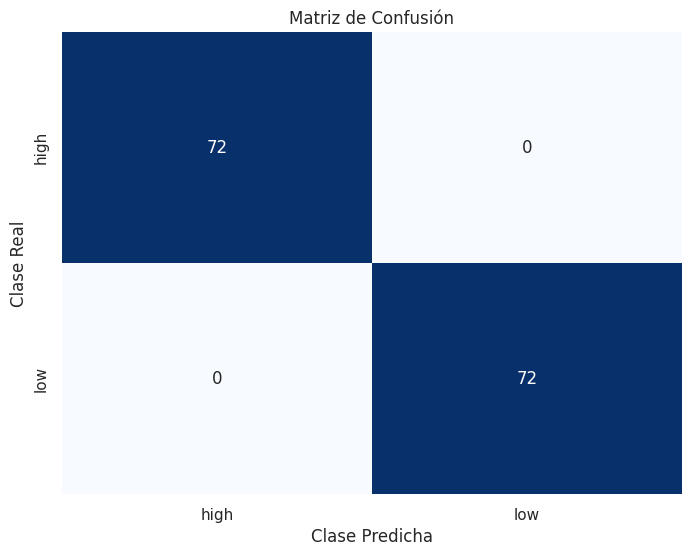

In [24]:
# Extrae los nombres de las clases que fueron codificadas por el LabelEncoder
class_names = labelencoder.classes_

# Visualiza la matriz de confusión en forma de gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# 4. Reto de Clasificación Multi-clase con Árboles de Decisión y k-Nearest Neighbors (KNN)

El objetivo de este reto es implementar y comparar dos algoritmos de clasificación, Árboles de Decisión y k-Nearest Neighbors (KNN), en un problema de clasificación multi-clase utilizando el conocido conjunto de datos Iris.

### Descripción del Problema
- Utilizaremos el conjunto de datos Iris, que contiene información sobre tres especies de flores (Setosa, Versicolor y Virginica).
- Cada instancia tiene cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.
- El objetivo es predecir las especies de flores basadas en estas características.

### Pasos a seguir
1. **Cargar el conjunto de datos Iris.**
2. **Dividir los datos en características (X) y etiquetas (y).**
3. **Dividir los datos en conjuntos de entrenamiento y prueba.**
4. **Entrenar un clasificador de Árbol de Decisión y un clasificador KNN utilizando el conjunto de entrenamiento.**
5. **Realizar predicciones en el conjunto de prueba utilizando ambos modelos.**
6. **Calcular la matriz de confusión para cada modelo y analizar qué tan bien clasificaron las diferentes especies de flores.**

### Resultado Final
- Presenta tu código en un Jupyter Notebook.
- Incluye visualizaciones de la matriz de confusión.
- Realiza un análisis comparativo entre los resultados de los dos modelos y saca conclusiones sobre su desempeño en la clasificación de las especies de flores.
